In [1]:
import pandas as pd

In [2]:
police_killings=pd.read_csv('police_killings.csv', encoding='ISO-8859-1')

In [3]:
police_killings.head()

name age gender    raceethnicity     month  day  year  \
0  A'donte Washington  16   Male            Black  February   23  2015   
1      Aaron Rutledge  27   Male            White     April    2  2015   
2         Aaron Siler  26   Male            White     March   14  2015   
3        Aaron Valdez  25   Male  Hispanic/Latino     March   11  2015   
4        Adam Jovicic  29   Male            White     March   19  2015   

            streetaddress          city state    ...     share_hispanic  \
0            Clearview Ln     Millbrook    AL    ...                5.6   
1  300 block Iris Park Dr     Pineville    LA    ...                0.5   
2    22nd Ave and 56th St       Kenosha    WI    ...               16.8   
3       3000 Seminole Ave    South Gate    CA    ...               98.8   
4          364 Hiwood Ave  Munroe Falls    OH    ...                1.7   

   p_income  h_income  county_income  comp_income  county_bucket  nat_bucket  \
0     28375   51367.0          54766     0.937936            3.0         3.0   
1     14678   27972.0          40930     0.683411            2.0         1.0   
2     25286   45365.0          54930     0.825869            2.0         3.0   
3     17194   48295.0          55909     0.863814            3.0         3.0   
4     33954   68785.0          49669     1.384868            5.0         4.0   

    pov     urate   college  
0  14.1  0.097686  0.168510  
1  28.8  0.065724  0.111402  
2  14.6  0.166293  0.147312  
3  11.7  0.124827  0.050133  
4   1.9  0.063550  0.403954  

[5 rows x 34 columns]

In [4]:
unique=police_killings['raceethnicity'].value_counts()

In [5]:
import matplotlib.pyplot as plt

In [6]:
print(unique)

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64


In [7]:
%matplotlib inline

<Container object of 1 artists>

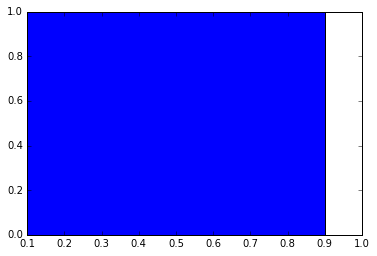

In [8]:
plt.bar(0.1,1, width=0.8)

In [9]:
import numpy as np
width=0.8
ind = np.arange(len(unique))  # the x locations for the groups

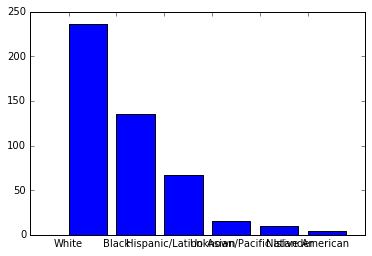

In [10]:
fig1=plt.bar(ind+width,unique, width=0.8,tick_label=unique.index)

The highest frequency of police killings are amongst White Americans, followed by Black and Hispanic Americans. This figure however does not show a complete picture as whites are a much larger proportion of the american populaton and the killings per capita may be smaller. 

In [11]:
income=police_killings[police_killings.p_income!='-']['p_income']

In [12]:
income=income.astype(int)

In [13]:
income[0]

28375

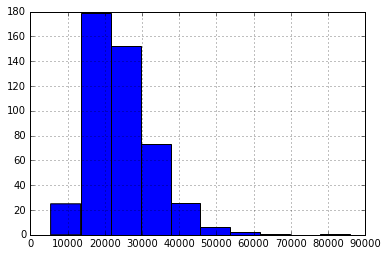

In [14]:
income.hist()

In [15]:
state_pop=pd.read_csv('state_population.csv')

In [16]:
counts=police_killings['state_fp'].value_counts()

In [17]:
states = pd.DataFrame({"STATE": counts.index, "shootings": counts})

In [18]:
states=states.merge(state_pop,on='STATE')

In [19]:
states['pop_millions']=states['POPESTIMATE2015']/1000000

In [20]:
states['rate']=states['shootings']/states['pop_millions']

In [21]:
print(states)

    STATE  shootings  SUMLEV REGION DIVISION                  NAME  \
0       6         74      40      4        9            California   
1      48         47      40      3        7                 Texas   
2      12         29      40      3        5               Florida   
3       4         25      40      4        8               Arizona   
4      40         22      40      3        7              Oklahoma   
5      13         16      40      3        5               Georgia   
6      36         13      40      1        2              New York   
7       8         12      40      4        8              Colorado   
8      34         11      40      1        2            New Jersey   
9      53         11      40      4        9            Washington   
10     22         11      40      3        7             Louisiana   
11     17         11      40      2        3              Illinois   
12     39         10      40      2        3                  Ohio   
13     29         10

In [22]:
print(states.sort('rate'))

    STATE  shootings  SUMLEV REGION DIVISION                  NAME  \
43      9          1      40      1        1           Connecticut   
22     42          7      40      1        2          Pennsylvania   
38     19          2      40      2        4                  Iowa   
6      36         13      40      1        2              New York   
29     25          5      40      1        1         Massachusetts   
42     33          1      40      1        1         New Hampshire   
45     23          1      40      1        1                 Maine   
11     17         11      40      2        3              Illinois   
12     39         10      40      2        3                  Ohio   
31     55          5      40      2        3             Wisconsin   
16     26          9      40      2        3              Michigan   
28     47          6      40      3        6             Tennessee   
15     37         10      40      3        5        North Carolina   
36     32          3

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Oklahoma has the highest rate of shooting per million, followed by Arizona and Nebraska. On the other hand, Connecticut has the lowest rate of shootings per million people.

In [23]:
pk=pd.DataFrame(police_killings[police_killings.share_white!='-']['share_white'])

In [24]:
pk.head()

share_white
0        60.5
1        53.8
2        73.8
3         1.2
4        92.5

In [25]:
pk['share_black']=police_killings[police_killings.share_black!='-']['share_black']

In [26]:
pk.head()

share_white share_black
0        60.5        30.5
1        53.8        36.2
2        73.8         7.7
3         1.2         0.6
4        92.5         1.4

In [27]:
pk['share_hispanic']=police_killings[police_killings.share_hispanic!='-']['share_hispanic']

In [28]:
pk.head()

share_white share_black share_hispanic
0        60.5        30.5            5.6
1        53.8        36.2            0.5
2        73.8         7.7           16.8
3         1.2         0.6           98.8
4        92.5         1.4            1.7

In [29]:
pk['share_white']=pk['share_white'].astype('float')
pk['share_black']=pk['share_black'].astype('float')
pk['share_hispanic']=pk['share_hispanic'].astype('float')

In [30]:
pk.head()

share_white  share_black  share_hispanic
0         60.5         30.5             5.6
1         53.8         36.2             0.5
2         73.8          7.7            16.8
3          1.2          0.6            98.8
4         92.5          1.4             1.7

In [69]:
states_low=states.sort('rate').head(10)['NAME']
states_high=states.sort('rate').head(-10)['NAME']

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [34]:
print(states_low)

43      Connecticut
22     Pennsylvania
38             Iowa
6          New York
29    Massachusetts
42    New Hampshire
45            Maine
11         Illinois
12             Ohio
31        Wisconsin
Name: NAME, dtype: object


In [45]:
print(states_low.index)

Int64Index([43, 22, 38, 6, 29, 42, 45, 11, 12, 31], dtype='int64')


In [51]:
police_killings.describe()

/dataquest/system/env/python3/lib/python3.4/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


day    year    latitude   longitude    state_fp   county_fp  \
count  467.000000   467.0  467.000000  467.000000  467.000000  467.000000   
mean    15.830835  2015.0   36.403224  -96.972666   25.342612   91.584582   
std      8.658970     0.0    5.193357   16.953842   16.766458  110.185129   
min      1.000000  2015.0   19.915194 -159.642700    1.000000    1.000000   
25%      8.000000  2015.0   33.335240 -111.954636    8.000000   29.000000   
50%     16.000000  2015.0   35.769779  -94.761902   24.000000   63.000000   
75%     23.000000  2015.0   39.937452  -82.961582   40.000000  111.000000   
max     31.000000  2015.0   61.218408  -68.100007   56.000000  740.000000   

            tract_ce        geo_id     county_id           pop       h_income  \
count     467.000000  4.670000e+02    467.000000    467.000000     465.000000   
mean   236936.614561  2.543443e+10  25434.197002   4783.719486   46627.182796   
std    341262.721715  1.680140e+10  16801.379755   2374.565749   20511.194907   
min       100.000000  1.003010e+09   1003.000000      0.000000   10290.000000   
25%      5201.500000  8.022008e+09   8022.000000   3357.500000            NaN   
50%     40200.000000  2.403380e+10  24033.000000   4447.000000            NaN   
75%    378450.000000  4.011247e+10  40112.000000   5815.500000            NaN   
max    980000.000000  5.600500e+10  56005.000000  26826.000000  142500.000000   

       county_income  comp_income  county_bucket  nat_bucket       urate  \
count     467.000000   465.000000     440.000000  465.000000  465.000000   
mean    52527.331906     0.895913       2.497727    2.496774    0.117399   
std     12948.263811     0.333584       1.393115    1.298412    0.069175   
min     22545.000000     0.184049       1.000000    1.000000    0.011335   
25%     43804.000000          NaN            NaN         NaN         NaN   
50%     50856.000000          NaN            NaN         NaN         NaN   
75%     56832.000000          NaN            NaN         NaN         NaN   
max    110292.000000     2.865216       5.000000    5.000000    0.507614   

          college  
count  465.000000  
mean     0.220217  
std      0.158347  
min      0.013547  
25%           NaN  
50%           NaN  
75%           NaN  
max      0.828070

In [56]:
police_killings['state_fp'].isin(states_low.index)

0      False
1       True
2      False
3       True
4      False
5      False
6       True
7       True
8      False
9      False
10      True
11      True
12     False
13     False
14     False
15     False
16     False
17     False
18      True
19      True
20      True
21      True
22     False
23      True
24     False
25     False
26     False
27      True
28      True
29     False
       ...  
437     True
438    False
439    False
440     True
441    False
442    False
443    False
444    False
445    False
446    False
447    False
448    False
449     True
450    False
451    False
452    False
453    False
454     True
455    False
456    False
457     True
458    False
459    False
460    False
461    False
462    False
463    False
464    False
465     True
466     True
Name: state_fp, dtype: bool

In [59]:
loww=police_killings[police_killings['state_fp'].isin(states_low.index)==True]

In [68]:
loww=pk[police_killings['state_fp'].isin(states_low.index)==True]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [70]:
highh=pk[police_killings['state_fp'].isin(states_high.index)==True]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [73]:
loww.mean()

share_white       43.245205
share_black       18.639726
share_hispanic    28.398630
dtype: float64

In [74]:
highh.mean()

share_white       51.261465
share_black       20.496497
share_hispanic    19.570701
dtype: float64

An interesting observation: Areas with less diverse populations witnessed less police killings than those with more diverse populations. In particular, areas with higher percentage of white people witnessed higher police killings.

In [75]:
dashes=police_killings[police_killings.share_white=='-']

In [76]:
print(dashes)

                     name age gender raceethnicity    month  day  year  \
182  Hashim Abdul-Rasheed  41   Male         Black  January    7  2015   
378         Richard White  63   Male         Black    March   20  2015   

                                         streetaddress      city state  \
182                         4600 International Gateway  Columbus    OH   
378  Louis Armstrong New Orleans International Airp...    Kenner    LA   

      ...    share_hispanic  p_income  h_income  county_income  comp_income  \
182   ...                 -         -       NaN          50877          NaN   
378   ...                 -         -       NaN          48261          NaN   

     county_bucket  nat_bucket pov urate college  
182            NaN         NaN   -   NaN     NaN  
378            NaN         NaN   -   NaN     NaN  

[2 rows x 34 columns]


Only two rows contained no information related to the share of whites, blacks and hispanics in the county population. Both Lousiana and Ohio are in the top ten states with high police killings. Therefore the mean values of the share of races in states with with high police killings may have been effected by removing the two rows, while the mean values of the share of races in states with low police killings shoudl be unaffected. 

By analysing averaged county level data instead of state level data, the analsyis may be skewed as each county will have 